## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_scor
import seaborn as sn

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



ImportError: cannot import name 'r2_scor' from 'sklearn.metrics' (C:\Users\xengo\anaconda4\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
# Combine the data into a single dataset
mouse_metadata_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_metadata_df.head(10)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
mouse_num = mouse_metadata_df["Mouse ID"].nunique()
mouse_num

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Gets the Mouse ID and Timepoint and then shows how many times the id appears at that time point hence the count
mouse_duplicates = mouse_metadata_df.groupby(["Mouse ID", "Timepoint"]).size()
mouse_duplicates2 = mouse_duplicates.reset_index()
mouse_duplicates2.columns = ["Mouse ID", "Timepoint", "Count"]

mouse_duplicates2.head()

,Mouse ID,Timepoint,Count
0,a203,0,1
1,a203,5,1
2,a203,10,1
3,a203,15,1
4,a203,20,1


In [9]:
mouse_dup_bycount = mouse_duplicates2.sort_values(by="Count", ascending=False)
mouse_dup_bycount.head(10)

,Mouse ID,Timepoint,Count
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [10]:
mouse_dup_bycount.Count.value_counts().head(10)

1    1883
2       5
Name: Count, dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = mouse_metadata_df["Mouse ID"] == "g989"
mouse_metadata_df.loc[mask]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_metadata_df["Mouse ID"] != "g989"
mouse_metadata_clean = mouse_metadata_df.loc[mask].reset_index(drop=True)
mouse_metadata_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
# Checking the number of mice in the clean DataFrame.
mouse_cleannum = mouse_metadata_clean["Mouse ID"].nunique()
mouse_cleannum

248

In [14]:
mouse_metadata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_mean = mouse_metadata_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = mouse_metadata_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = mouse_metadata_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_stddev = mouse_metadata_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = mouse_metadata_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()




 
# Assemble the resulting series into a single summary dataframe.
drug_df = pd.DataFrame({"Tumor Mean": drug_mean, 
                        "Tumor Meadian": drug_median, 
                        "Tumor Variance": drug_variance,
                        "Tumor STD": drug_stddev, 
                        "Tumor SEM": drug_sem})
drug_df


,Tumor Mean,Tumor Meadian,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
drug_df.T

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Tumor Meadian,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Tumor Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Tumor STD,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Tumor SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_metadata_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
drug_mouse_bar = mouse_metadata_clean.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()
drug_mouse_bar.rename(columns={"Mouse ID": "Mouse Count"}, inplace=True)
drug_mouse_bar

,Drug Regimen,Mouse Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


array([<AxesSubplot:title={'center':'Mouse Count'}, ylabel='Number of Mice'>],
      dtype=object)

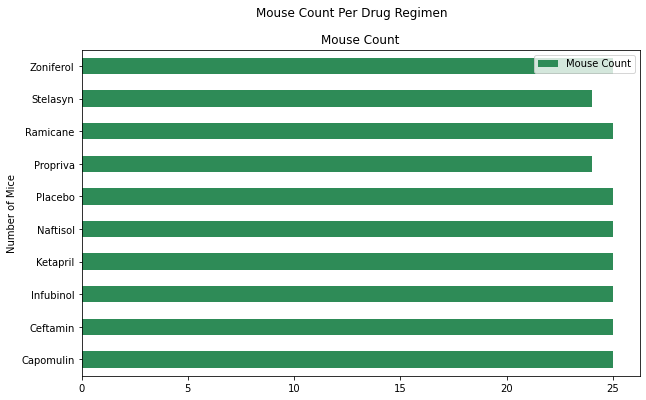

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_mouse_bar.plot.barh(x=("Drug Regimen"), y=("Mouse Count"), color="seagreen", 
                        figsize=(10,6), title=("Mouse Count Per Drug Regimen"), xlabel=("Number of Mice"),
                        subplots=True)

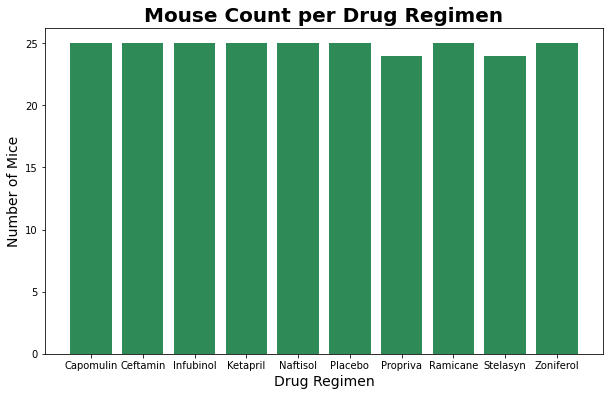

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(drug_mouse_bar["Drug Regimen"], drug_mouse_bar["Mouse Count"], color="seagreen")

plt.title("Mouse Count per Drug Regimen", fontsize=20, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)

plt.show()


In [21]:
ms_gender = mouse_metadata_clean.loc[:, ["Mouse ID", "Sex"]].drop_duplicates().reset_index()
ms_gender.head()

,index,Mouse ID,Sex
0,0,b128,Female
1,10,f932,Male
2,11,g107,Female
3,19,a457,Female
4,22,c819,Male


In [22]:
ms_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     248 non-null    int64 
 1   Mouse ID  248 non-null    object
 2   Sex       248 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [23]:
ms_gender.Sex.value_counts()


Male      125
Female    123
Name: Sex, dtype: int64

In [24]:
ms_gender_count = ms_gender.Sex.value_counts().index
ms_gender_count

Index(['Male', 'Female'], dtype='object')

In [25]:
ms_gender_array = ms_gender.Sex.value_counts().values
ms_gender_array

array([125, 123], dtype=int64)

In [26]:
colors = ["royalblue", "deeppink"]
explode = (0,0.1)

array([<AxesSubplot:ylabel='index'>], dtype=object)

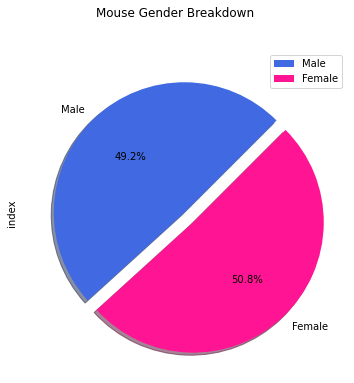

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ms_gender.groupby(["Sex"]).sum().plot.pie(subplots=True, colors=colors, 
                                          labels=ms_gender_count, autopct="%1.1f%%",
                                         explode=explode,shadow=True, startangle=45,
                                         figsize=(10,6), title=("Mouse Gender Breakdown"))

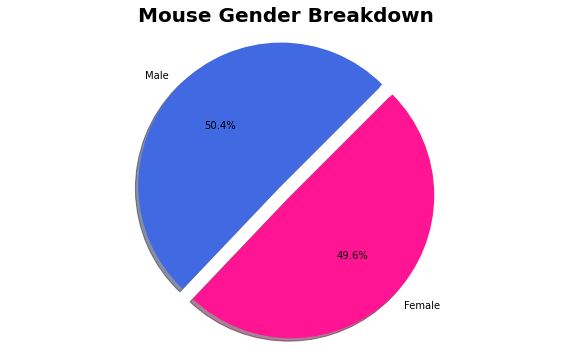

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

 # Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(10,6))
plt.pie(ms_gender_array, explode=explode, labels=ms_gender_count, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)

# Create axes which are equal and have a perfect circle
plt.axis("equal")

plt.title("Mouse Gender Breakdown", fontsize=20, fontweight="bold")
plt.show()



## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_df1 = mouse_metadata_clean.groupby(["Mouse ID", "Drug Regimen"]).Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df2 = pd.merge(final_df1, mouse_metadata_clean, on=["Mouse ID", "Drug Regimen", "Timepoint"], how="left")
final_df2.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
mask = [True if x in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] else False for x in final_df2['Drug Regimen']]
mask

    

[True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,


In [31]:
# Create empty list to fill with tumor vol data (for plotting)
final_df3 = final_df2.loc[mask].reset_index(drop=True)
final_df3.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25


In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_df3['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


# Locate the rows which contain mice on each drug and get the tumor volumes
x=final_df3.groupby("Mouse ID") 

    
    # add subset 
    
    
   # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_tumor = final_df3.loc[(final_df3['Tumor Volume (mm3)'] < lower_bound) | (final_df3['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)


In [34]:
final_df3.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,35.700000,47.197795,1.45000,13.520000,23.710000
std,14.442852,12.953884,1.14922,7.608448,4.472802
min,0.000000,22.050126,0.00000,1.000000,15.000000
25%,30.000000,37.187744,1.00000,7.000000,20.000000
50%,45.000000,45.000000,1.00000,15.000000,25.000000
75%,45.000000,59.930262,2.00000,20.000000,27.250000
max,45.000000,72.226731,4.00000,24.000000,30.000000


In [35]:
final_df3["Tumor Volume (mm3)"].mean() + 2*final_df3["Tumor Volume (mm3)"].std()

73.1055630357805

In [36]:
final_df3["Tumor Volume (mm3)"].mean() - 2*final_df3["Tumor Volume (mm3)"].std()

21.290027343219524

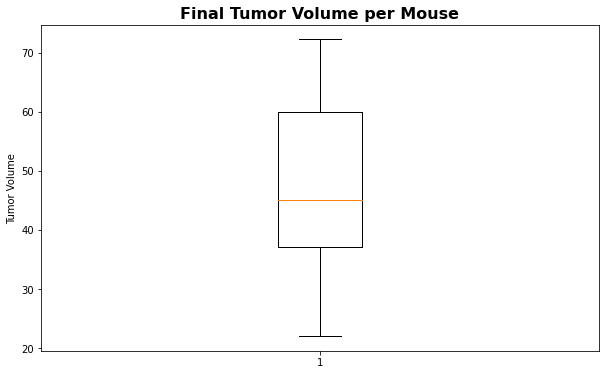

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10, 6))
plt.boxplot(final_df3["Tumor Volume (mm3)"])
plt.title("Final Tumor Volume per Mouse", fontweight="bold", fontsize=16)
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

In [65]:
time = np.arange(1,2,2)
tumor_volume_list = final_df3["Tumor Volume (mm3)"], ["Drug Regimen", ("Capomulin")]
timepoint_list = final_df3["Timepoint"], ["Drug Regimen", ("Capomulin")]
tumor_volume_list.info()

AttributeError: 'tuple' object has no attribute 'info'

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tml=np.array((tumor_volume_list))
tpl=np.array([timepoint_list])
tumor_volume, = plt.plot(time, tml, color="red", label="Tumor Volume for Capomulin")
timepoint, = plt.plot(time, tpl, color="blue", label="Timepoint for Capomulin")

SyntaxError: invalid syntax (<ipython-input-59-a3d4dce61b80>, line 2)

ValueError: x and y must be the same size

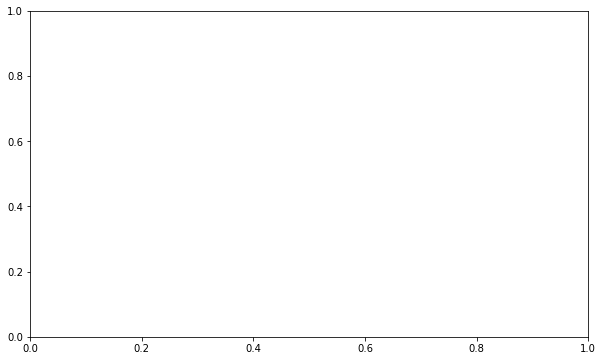

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = final_df3["Tumor Volume (mm3)"].mean()
mouse_weight=final_df3["Weight (g)"]

plt.figure(figsize=(10,6))

plt.scatter(avg_tumor, mouse_weight)
plt.ylabel("Mouse Weight")
plt.xlabel("Average Tumor)
plt.title("Scatter Plot")

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
